In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network  import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#### Read the dataset

In [19]:
df = pd.read_csv('mnist_784.csv')
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [20]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [21]:
df['class'].value_counts()

class
1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: count, dtype: int64

In [22]:
#### Rename columns

new_columns = {
    old_name: str(i)
    for i, old_name in enumerate(df.columns)
    if old_name != 'class'
}
new_columns

df = df.rename(columns=new_columns)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [23]:
x = df.drop(columns='class')
y = df['class']

In [ ]:
for i in range(5):
    plt.imshow(x.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.show()

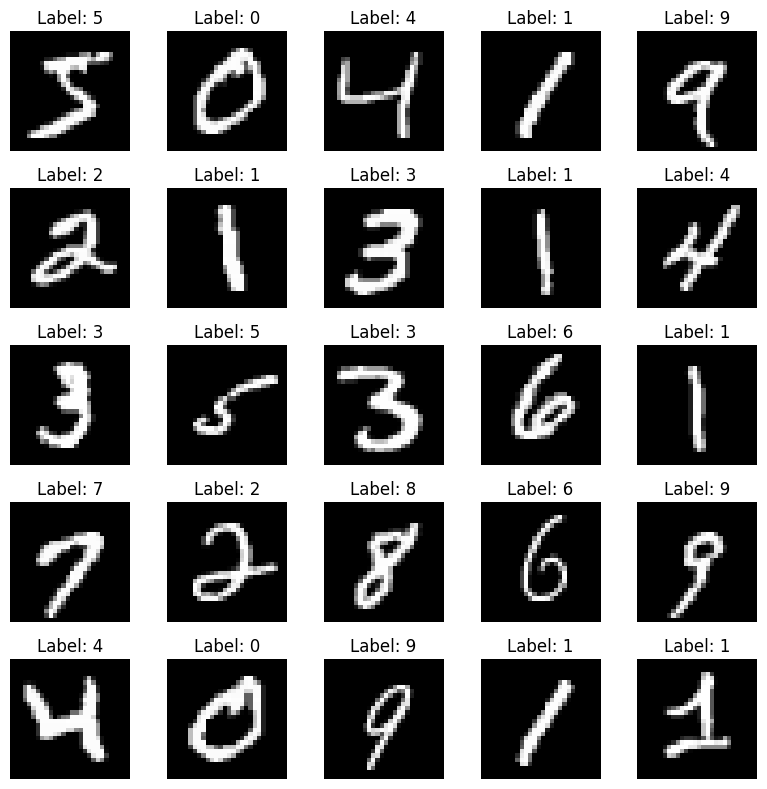

In [28]:
fix, axes = plt.subplots(5, 5, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(x.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {df["class"].iloc[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [30]:
mlp = MLPClassifier(hidden_layer_sizes=1, activation='relu', max_iter=10)
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation='relu', max_iter=10)
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation='relu', max_iter=10)

In [31]:
mlp.fit(x_train, y_train)
mlp1.fit(x_train, y_train)
mlp2.fit(x_train, y_train)

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,1000
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,10
,shuffle,True
,random_state,None


In [33]:
#### Evaluate the model

predictions_NN = mlp.predict(x_test)
predictions_NN1 = mlp1.predict(x_test)
predictions_NN2 = mlp2.predict(x_test)

In [ ]:
print(f'Actual Value: {y_test.iloc[0]}')
print(f'Predict Value: {predictions_NN[0]}')

plt.imshow(x_test.iloc[0].values.reshape((28, 28)), cmap='gray')
plt.show()

In [ ]:
#### Confusion Matrix for 1 hidden layer

sns.heatmap(confusion_matrix(y_test, predictions_NN), fmt='d', annot=True, cmap='Blues')

In [ ]:
mask = y_test.isin[4, 5, 6, 7, 8, 9]
x_sel = x_test[mask].reset_index(drop=True)
y_true_sel = y_test[mask].reset_index(drop=True)
y_pred_sel = predictions_NN1[mask]

error_mask = y_pred